# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14,6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

<AxesSubplot:>

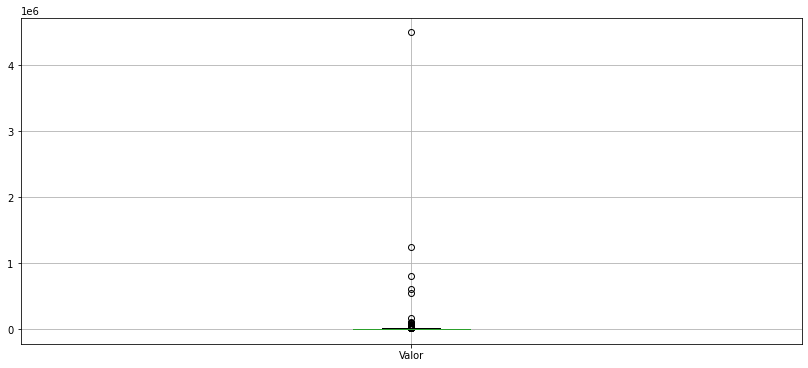

In [13]:
dados.boxplot(['Valor'])

In [24]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7550,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10527,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,casas
12529,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13691,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15353,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [15]:
valor = dados['Valor']

In [18]:
Q1 = dados.quantile(.25)
Q3 = dados.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [21]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

ValueError: Can only compare identically-labeled Series objects

In [25]:
dados_new.boxplot(['Valor'])

NameError: name 'dados_new' is not defined

NameError: name 'dados_new' is not defined

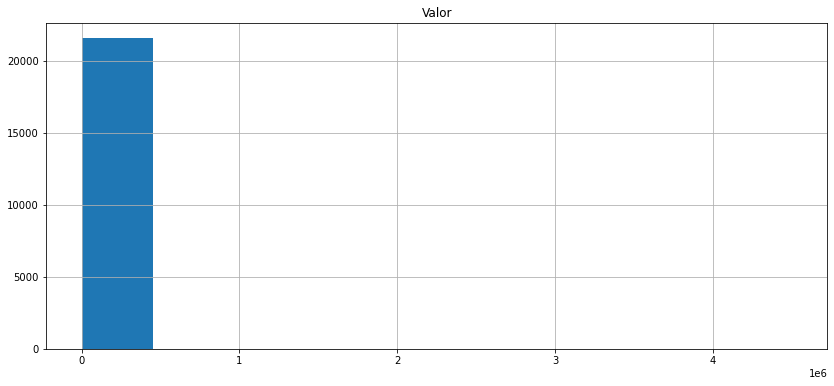

In [22]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers (continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

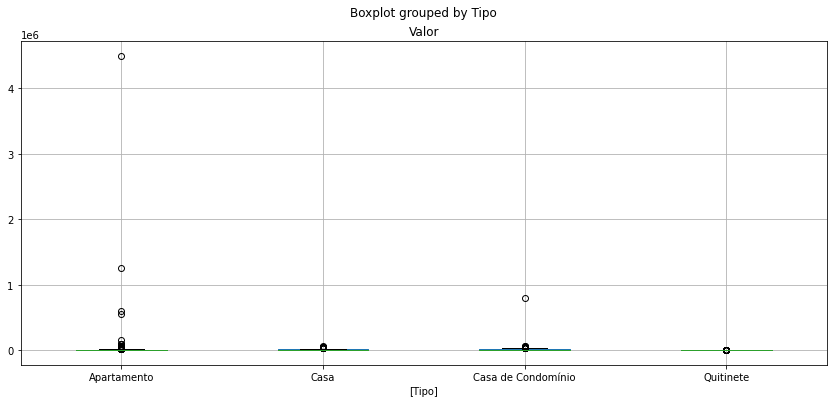

In [26]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [29]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [30]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [31]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21564, 21565, 21567, 21568, 21569, 21570, 21572, 21574, 21575,
             21576],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    95,    99,   143,   159,   179,
               235,
             ...
             21337, 21360, 21368, 21420, 21425, 21452, 21508, 21532, 21544,
             21555],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   165,   167,   182,
               206,
             ...
             21462, 21464, 21471, 21504, 21514, 21515, 21533, 21542, 21552,
             21571],
            dtype='int64', length=996),
 'Quitinete': Int64Index([    0,    10,    28,    71,    78,    85,   100,   119,   145,
               173,
             ...
             21139, 21165, 21196, 21409, 21435, 21440, 21480, 21500, 21566,
 

In [32]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [33]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Quitinete              900.0
Name: Valor, dtype: float64

In [34]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [35]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Quitinete               600.0
Name: Valor, dtype: float64

In [36]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [37]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [38]:
limite_superior['Apartamento']

9950.0

In [39]:
limite_superior['Casa']

22850.0

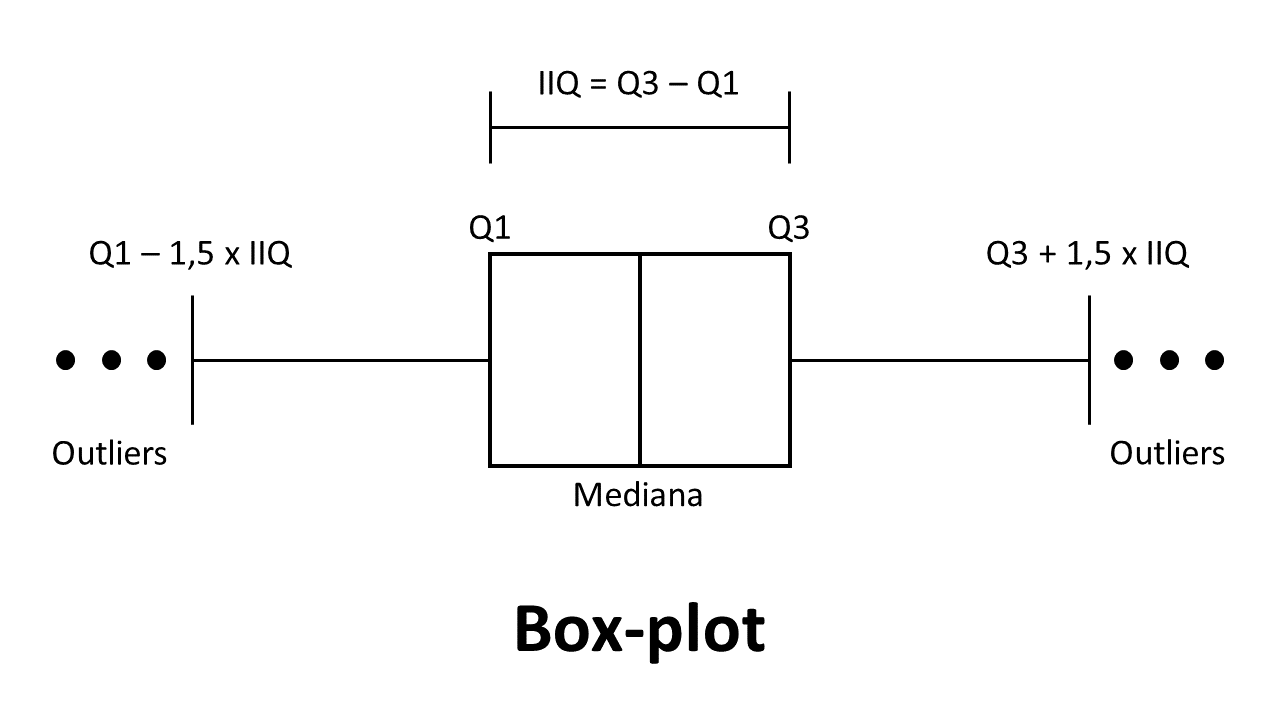

In [41]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)
    

Apartamento
Casa
Casa de Condomínio
Quitinete


In [42]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]

In [43]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

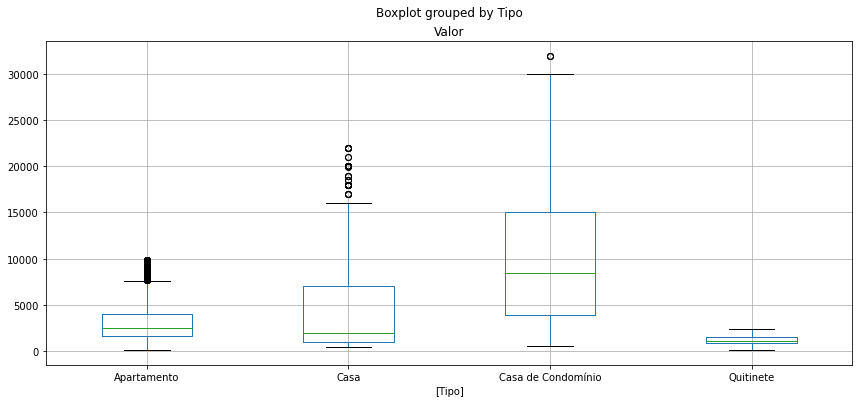

In [44]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [45]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)